# TEMA1. METODOS DE PARTICIONAMIENTO

## CLUSTER POR K-MEDIAS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import scipy.stats as stats #Para calculo de p-values, prob estadisticas
from sklearn.model_selection import train_test_split # Para particionamiento de datos
from sklearn.preprocessing import StandardScaler #Para estandarizacion
from sklearn.preprocessing import MinMaxScaler #Para normalizacion
from sklearn.metrics import euclidean_distances, silhouette_score #Para obtener valores de silueta
from sklearn.cluster import KMeans #Para utilizar el método KMeans

In [3]:
os.chdir("D:\Social Data Consulting\Python for Data Science\data")

#### Primero se ejemplificará una data simulada basada en 3 clusters

In [5]:
from sklearn.datasets import make_blobs
#Creando valores simulados agrupados en 3 clusters
X,y=make_blobs(n_samples=150,#numero de registros
              n_features=2,#numero de variables
              centers=3,#numero clusters
              cluster_std=0.5, #desviacion estandar de los clusters
              shuffle=True,#realiza el proceso aleatorio
              random_state=0) #semilla

In [6]:
#Mostrando los 10 primeros registros
X[0:10]

array([[ 2.60509732,  1.22529553],
       [ 0.5323772 ,  3.31338909],
       [ 0.802314  ,  4.38196181],
       [ 0.5285368 ,  4.49723858],
       [ 2.61858548,  0.35769791],
       [ 1.59141542,  4.90497725],
       [ 1.74265969,  5.03846671],
       [ 2.37533328,  0.08918564],
       [-2.12133364,  2.66447408],
       [ 1.72039618,  5.25173192]])

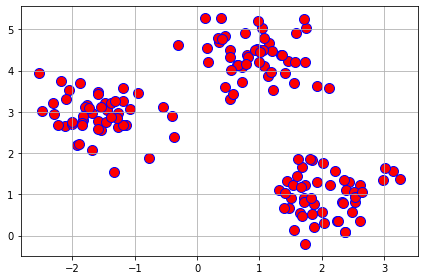

In [18]:
#Ploteando la información simulada a partir de 3 clusters
plt.scatter(X[:,0], #Elementos del eje x
            X[:,1],#Elementos del eje y
           c='red', marker='o',s=100,edgecolors='blue')
plt.grid()
plt.tight_layout() #Ajusta el diseño 
plt.show()

## Escalamiento de los datos

In [21]:
#Instanciando un objeto de clase 
sc=StandardScaler()
X_Std=sc.fit_transform(X)

In [10]:
X_Std[0:10]

array([[ 1.32957823e+00, -1.03136394e+00],
       [ 4.01618359e-02,  3.84826801e-01],
       [ 2.08086551e-01,  1.10955620e+00],
       [ 3.77727611e-02,  1.18773942e+00],
       [ 1.33796907e+00, -1.61978762e+00],
       [ 6.98977864e-01,  1.46427671e+00],
       [ 7.93065260e-01,  1.55481218e+00],
       [ 1.18664455e+00, -1.80189852e+00],
       [-1.61068250e+00, -5.52815542e-02],
       [ 7.79215375e-01,  1.69945331e+00],
       [ 1.66039781e+00, -8.00339789e-01],
       [-5.24273745e-01, -2.42877545e-01],
       [-1.43916565e+00, -1.81338024e-02],
       [ 1.57778203e-01,  9.07980762e-01],
       [-1.90761522e-01,  1.21347107e+00],
       [-1.53465918e+00, -2.24669209e-02],
       [-1.21049755e+00,  3.14271385e-01],
       [ 8.72703176e-01, -1.33474713e+00],
       [-1.28222614e+00,  1.56012707e-02],
       [ 9.75316453e-01, -1.64968432e+00],
       [ 1.07137587e-01,  9.34608140e-01],
       [ 1.22759637e+00, -9.74311769e-01],
       [ 4.13680699e-01,  7.66903342e-01],
       [ 3.

### K-Means 

In [12]:
#Creamos una instancia de K-Means 
km=KMeans(n_clusters=3,# numero de clusters
         init='k-means++', #centroides iniciales
         n_init=10, #numero de veces que se ejecutará el algoritmo
         tol=0.0004,#tolerancia para declarar la convergencia
         random_state=2020)#semilla

In [13]:
#Numero de clusters
km.n_clusters

3

In [14]:
#Obteniendo las etiquetas de clusters
y_km=km.fit_predict(X_Std)
y_km

array([2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2,
       2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2])

In [15]:
#Los centros de clusters
km.cluster_centers_

array([[-1.28308805,  0.11962887],
       [ 0.28936316,  1.09073236],
       [ 0.99372488, -1.21036123]])

### _Construyendo la funcion Grafico de Cluster_

In [16]:
#Librerías a utilizar
import random

#Grafico_de_cluster
def Grafico_de_cluster(X,n_clusters,init,n_init,max_iter,semilla,tol,name_colors_c_list,name_colors_edgecolor_list,name_makers_list):
    km = KMeans(n_clusters=n_clusters,
                    init=init, #elija k observaciones (filas) para los centroides iniciales
                    n_init=n_init, #número de veces que el algoritmo se ejecutará
                    max_iter=max_iter,#número máximo de iteraciones para una ejecución
                    tol=tol, #tolerancia para declarar convergencia
                    random_state=semilla) #semilla
    y_km = km.fit_predict(X)
    for i in range(0,km.n_clusters):
            plt.scatter(X[y_km == i, 0], #primer clúster
                        X[y_km == i, 1],
                        s=50,
                        c=name_colors_c_list[i],#El color de los puntos
                        edgecolor=name_colors_edgecolor_list[i],#El punto de colors
                        marker=name_makers_list[random.randint(0,1)],#El tipo de representación
                        label='cluster '+str(i+1))
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
                    s=250, marker='*', c='red', label='centroides')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


### _Ingresando los argumentos para la funcion Grafico de Clusters_

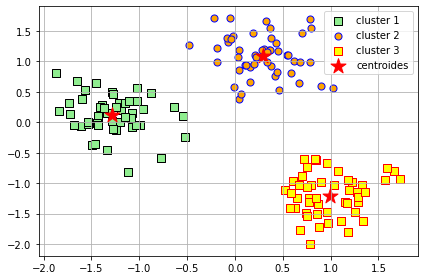

In [19]:
#Defino el numero de cluster en un array
name_colors_c_list=['lightgreen','orange','yellow']#Defino el color de los puntos
name_colors_edgecolor_list=['black','blue','red']#Defino los puntos de color
name_makers_list=['s','o','v']#Defino el tipo de representación del punto
n_clusters=3 #Se define el numero de clusters
init='k-means++' #elija k observaciones (filas) para los centroides iniciales
n_init=10 #número de veces que el algoritmo se ejecutará
max_iter=300#número máximo de iteraciones para una ejecución
tol=1e-04 #tolerancia para declarar convergencia
semilla = 2020
Grafico_de_cluster(X_Std,n_clusters,init,n_init,max_iter,semilla,tol,name_colors_c_list,name_colors_edgecolor_list,name_makers_list)

### _Obtencion del Numero Optimo de Clusters_

In [ ]:
Nos brinda la suma de las distancias al cuadrado de las muestras de su centroide mas cercano

### _Metodo del codo(Como funcion de la distancia de intra-cluster, el codo se forma donde NO se reduce considerablemente)_

In [23]:
inercia=[]
for i in range(2,11):
    km=KMeans(n_clusters=i,
             init='k-means++',
             n_init=10,
             tol=0.0004,
             random_state=2020)
    km.fit(X_Std)
    inercia.append(km.inertia_)

In [24]:
inercia

[116.06524144078875,
 30.674121776362227,
 26.332543928594312,
 22.308030294855328,
 20.446925799139976,
 16.817217513716596,
 14.998565710710846,
 13.047298364772281,
 11.589401109225658]

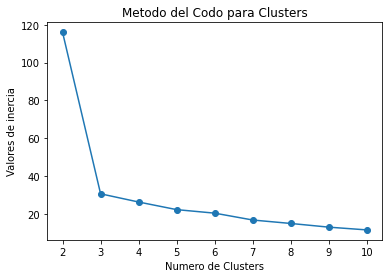

In [25]:
plt.plot(range(2,11),inercia,marker='o')
plt.title('Metodo del Codo para Clusters')
plt.xlabel('Numero de Clusters')
plt.ylabel('Valores de inercia')
plt.show()